In [119]:
import pandas as pd
import re
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D

In [120]:
#install tensorflow 2.8
!pip install tensorflow==2.8.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [121]:
#ambil link project dataset
url = 'https://raw.githubusercontent.com/RashidMaulana/Anticede/main/Machine%20Learning/data/datatest.csv'
dataset = pd.read_csv(url)

# Change text to lowercase
def proses_data(text):
    newText = text.lower()
    return newText
#ini case kalau semua mau ngerun semua data Komputerku kentang maka ngefreeze)
# dataset['comment_text'].apply(lambda x: print(x))
#ini case kalau semua mau ngerun 5 data pertama
testData = dataset['original_text']
testData = testData.apply(lambda x: proses_data(x))


#menghilangkan link dan tag html
import re
def link_remover(text):
    url_regex = re.compile(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?')
    return url_regex.sub('', text)
testData = testData.apply(lambda x: link_remover(x))

#menghilangkan kalimat bersama tag
import re
def tag_remover(text):
    tag_regex = re.compile(r'<[^>]+>')
    return tag_regex.sub('', text)
testData = testData.apply(lambda x: tag_remover(x))

# menghilangkan tanda baca dan karakter spesial
import re
def karakter_spesial(text):
    newText = re.sub('[^a-zA-Z0-9\s]', '', text)
    return newText
testData = testData.apply(lambda x: karakter_spesial(x))

# menghilangkan spasi berlebihan
def Spasi_berlebihan(text):  
    newText = re.sub('\s', ' ', text)
    return newText
testData = testData.apply(lambda x: Spasi_berlebihan(x))

#menghilangkan angka yang tidak perlu
def angka_berlebihan(text):
    newText = re.sub('[0-9]', '', text)
    return newText
testData = testData.apply(lambda x: angka_berlebihan(x))
testData.tail()


4995    puasa ora sok sokan gaweni story bukber kantor...
4996    kalau sudah begini rame  rame saling cuci tang...
4997     kebijakan presiden jokowi yang bikin pns baha...
4998          seorang filsuf pun harus     feel safe  ...
4999    museum date tapi museum pengkhianatan pki komunis
Name: original_text, dtype: object

In [122]:
dataset['pornografi'].value_counts()
#dataset['sara'].value_counts()
#dataset['radikalisme'].value_counts()
#dataset['pencemaran_nama_baik'].value_counts()
#dataset['original_text'].count()

0.0    4555
1.0     438
Name: pornografi, dtype: int64

In [123]:
#melatih data train dengan tensorflow
url_train_data = 'https://raw.githubusercontent.com/RashidMaulana/Anticede/main/Machine%20Learning/data/datatrain.csv'
train_data = pd.read_csv(url_train_data)

# Change text to lowercase
def proses_data(text):
    newText = text.lower()
    return newText
traindata = train_data['original_text']
traindata = traindata.apply(lambda x: proses_data(x))

#menghilangkan link dan tag html
def link_remover(text):
    url_regex = re.compile(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?')
    return url_regex.sub('', text)
traindata = traindata.apply(lambda x: link_remover(x))

#menghilangkan kalimat bersama @name
def name_remover(text):
    name_regex = re.compile(r'@[\w_-]+')
    return name_regex.sub(' ', text)
traindata = traindata.apply(lambda x: name_remover(x))

#menghilangkan tanda baca dan karakter spesial
def karakter_spesial(text):
    newText = re.sub('[^a-zA-Z0-9\s]', ' ', text)
    return newText
traindata = traindata.apply(lambda x: karakter_spesial(x))

#menghilang angka yang nempel dengan kalimat
def angka_berlebihan(text):
    newText = re.sub('[0-9]', '', text)
    return newText
traindata = traindata.apply(lambda x: angka_berlebihan(x))

#menghilangkan spasi berlebihan
def Spasi_berlebihan(text):  
    newText = re.sub('\s+', '', text)
    newText = re.sub('^\s+', '', text)
    return newText
traindata = traindata.apply(lambda x: Spasi_berlebihan(x))
traindata.tail()

995    nah loh  masih menyebut jokowi antek asing   c...
996    ade armando dipolisikan soal postingan     aza...
997    fifa siasat isu  suara monyet     aksi peranci...
998                           ya angkot lebih goblog    
999    njirr pahanya kok berlemak nabati gitu sih mas...
Name: original_text, dtype: object

In [124]:
#intialisasi list
kalimat_1 = [original_text for original_text in testData]
kalimat_2 = [original_text for original_text in traindata]
label_1 = [pornografi for pornografi in dataset['pornografi']]
label_2 = [pornografi for pornografi in train_data['pornografi']]





In [125]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 10000
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

# Initialize the Tokenizer class
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
# Fit the training data to the Tokenizer class
tokenizer.fit_on_texts(kalimat_1)
word_index = tokenizer.word_index
# Tokenize the training data
training_sequences = tokenizer.texts_to_sequences(kalimat_1)
# Tokenize the testing data
testing_sequences = tokenizer.texts_to_sequences(kalimat_2)
# Pad the training data to the max length
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
# Pad the testing data to the max length
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

#convert to numpy array
label_1 = np.array(label_1)
label_2 = np.array(label_2)

In [126]:
import tensorflow as tf

# Parameters
embedding_dim = 16
lstm_dim = 32
dense_dim = 24

# Model Definition with LSTM
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Set the training parameters
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_15 (Embedding)    (None, 120, 16)           160000    
                                                                 
 bidirectional_5 (Bidirectio  (None, 64)               12544     
 nal)                                                            
                                                                 
 dense_30 (Dense)            (None, 24)                1560      
                                                                 
 dense_31 (Dense)            (None, 1)                 25        
                                                                 
Total params: 174,129
Trainable params: 174,129
Non-trainable params: 0
_________________________________________________________________


In [127]:
NUM_EPOCHS = 10

# Train the model
history = model.fit(training_padded, label_1, epochs=NUM_EPOCHS, validation_data=(testing_padded, label_2))

Epoch 1/10
157/157 [==============================] - 29s 160ms/step - loss: nan - accuracy: 0.9082 - val_loss: nan - val_accuracy: 0.8910
Epoch 2/10
157/157 [==============================] - 16s 101ms/step - loss: nan - accuracy: 0.9110 - val_loss: nan - val_accuracy: 0.8910
Epoch 3/10
157/157 [==============================] - 12s 76ms/step - loss: nan - accuracy: 0.9110 - val_loss: nan - val_accuracy: 0.8910
Epoch 4/10
157/157 [==============================] - 12s 77ms/step - loss: nan - accuracy: 0.9110 - val_loss: nan - val_accuracy: 0.8910
Epoch 5/10
157/157 [==============================] - 16s 103ms/step - loss: nan - accuracy: 0.9110 - val_loss: nan - val_accuracy: 0.8910
Epoch 6/10
157/157 [==============================] - 20s 126ms/step - loss: nan - accuracy: 0.9110 - val_loss: nan - val_accuracy: 0.8910
Epoch 7/10
157/157 [==============================] - 12s 75ms/step - loss: nan - accuracy: 0.9110 - val_loss: nan - val_accuracy: 0.8910
Epoch 8/10
157/157 [==========

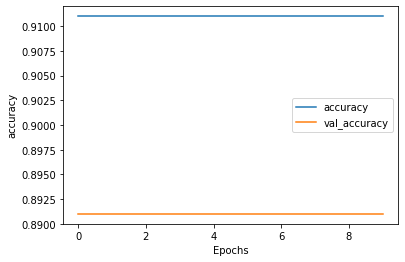

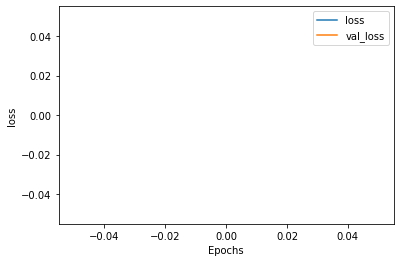

In [128]:
import matplotlib.pyplot as plt

# Plot Utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and loss history
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [129]:
#save model in h5 format
model.save('model.h5')